# Telecom Churn Case Study

## Table of contents

- [Telecom Churn Case Study](#telecom-churn-case-study)
- [Problem Statement](#problem-statement)
- [Business Goal](#business-goal)
- [Data Dictionary](#data-dictionary)
- [Steps Involved](#steps-involved)
  - [Reading and Understanding the data](#reading-and-understanding-data)
    - [Reading data](#reading-data)
    - [Understanding the data](#understanding-the-data)
  - [Cleaning the data](#cleaning-the-data)
      - [Impute missing values](#impute-missing-values)
  - [Deriving Data](#deriving-data)

## Problem Statement

>In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of **15-25%** annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

>For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

>In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Business Goal

>The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

>It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

>It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

>Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

<ins>**Recommend strategies to manage customer churn based on your observations.**</ins>
 

>Note that it's highly likely that you'll need to build multiple models to fulfil the objectives mentioned in Points 1 and 2.  Since here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model. 

 

>The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components that are not easy to interpret.



>Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. 

#### Import all ther required libraries

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import sweetviz as sv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as  MICE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE

#supress warnings
warnings.filterwarnings('ignore')

## Data Dictionary

In [80]:
data_dictionary = pd.read_csv('data_dictionary.csv')
data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


## Steps Involved

- Reading and Understand data
- Cleaning the data

### Reading and Understanding data

##### Reading Data

In [81]:
telecom_churn = pd.read_csv('train.csv')
telecom_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


##### Understanding the data

In [82]:
telecom_churn.shape

(69999, 172)

**There are total 699999 rows and 172 columns in the dataset**

In [83]:
telecom_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [84]:
telecom_churn.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,69999,69600,69266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,283.134365,278.185912,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,NaN,NaN,NaN,334.213918,344.366927,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,-2258.709000,-1289.715000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,93.581000,86.714000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,197.484000,191.588000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,NaN,NaN,NaN,370.791000,365.369500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000


In [85]:
sv_report = sv.analyze(telecom_churn, pairwise_analysis='off')
sv_report.show_html()

Feature: churn_probability                   |██████████| [100%]   01:14 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [86]:
telecom_churn_original = telecom_churn.copy()

###### Create categories of the columns

In [87]:
id_cols = ['circle_id']

date_cols = ['last_date_of_month_6',
                'last_date_of_month_7',
                'last_date_of_month_8',
                'date_of_last_rech_6',
                'date_of_last_rech_7',
                'date_of_last_rech_8',
                'date_of_last_rech_data_6',
                'date_of_last_rech_data_7',
                'date_of_last_rech_data_8'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]
num_cols = [column for column in telecom_churn.columns if column not in id_cols + date_cols + cat_cols]

In [88]:
# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom_churn.shape[1])

#ID cols: 1
#Date cols:9
#Numeric cols:156
#Category cols:6
True


##### Handling missing values

In [89]:
telecom_churn.isnull().sum()*100/telecom_churn.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

##### Impute missing values

**Impute with zeroes**

In [90]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

telecom_churn[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [91]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
telecom_churn.loc[telecom_churn.total_rech_data_6.isnull() & telecom_churn.date_of_last_rech_data_6.isnull(), [
    "total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
11,NaN,NaN
12,NaN,NaN


**In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.**

In [92]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
               ]

In [93]:
# impute missing values with 0
telecom_churn[zero_impute] = telecom_churn[zero_impute].apply(lambda x: x.fillna(0))

In [94]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(telecom_churn[zero_impute].isnull().sum()*100/telecom_churn.shape[1])

# summary
print("\n\nSummary statistics\n")
print(telecom_churn[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        69999.000000        69999.0000

In [95]:
# drop id and date columns
print("Shape before dropping: ", telecom_churn.shape)
telecom_churn = telecom_churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", telecom_churn.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 162)


##### Replace NaN values in categorical variables

**We will replace missing values in the categorical values with '-1' where '-1' will be a new category.**

In [96]:
# missing value ratio
print("Missing value ratio:\n")
print(telecom_churn[cat_cols].isnull().sum()*100/telecom_churn.shape[0])

Missing value ratio:

night_pck_user_6    74.902499
night_pck_user_7    74.478207
night_pck_user_8    73.689624
fb_user_6           74.902499
fb_user_7           74.478207
fb_user_8           73.689624
dtype: float64


##### iii) Drop variables with more than a given threshold of missing values

In [97]:
initial_cols = telecom_churn.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(telecom_churn.apply(lambda column: True if column.isnull(
).sum()/telecom_churn.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame(
    {'features': telecom_churn.columns, 'include': include_cols})
drop_missing.loc[drop_missing.include == True, :]

,features,include
0,id,True
1,loc_og_t2o_mou,True
2,std_og_t2o_mou,True
3,loc_ic_t2o_mou,True
4,arpu_6,True
...,...,...
157,aon,True
158,aug_vbc_3g,True
159,jul_vbc_3g,True
160,jun_vbc_3g,True


##### Impute using MICE

imputing all the numerical columns using MICE and then merging the imputed columns again to the main dataset

In [98]:
imputer = MICE(verbose = 2, random_state = 42, max_iter = 3)
telecom_churn_imputed = imputer.fit_transform(telecom_churn)

[IterativeImputer] Completing matrix with shape (69999, 162)
[IterativeImputer] Ending imputation round 1/3, elapsed time 193.75
[IterativeImputer] Change: 4.798082231803683e+20, scaled tolerance: 69.998 
[IterativeImputer] Ending imputation round 2/3, elapsed time 387.55
[IterativeImputer] Change: 3.249703960893795e+29, scaled tolerance: 69.998 
[IterativeImputer] Ending imputation round 3/3, elapsed time 558.78
[IterativeImputer] Change: 1.1700004965589787e+29, scaled tolerance: 69.998 


**Converting the imputed data back to a dataframe from a numpy array**

In [99]:
column_names = telecom_churn.columns
telecom_churn = pd.DataFrame(telecom_churn_imputed, columns = column_names)

##### Filter high value customers

In [100]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_churn['total_data_rech_6'] = telecom_churn.total_rech_data_6 * \
    telecom_churn.av_rech_amt_data_7
telecom_churn['total_data_rech_7'] = telecom_churn.total_rech_data_7 * \
    telecom_churn.av_rech_amt_data_7

**Add total data recharge and total recharge to get total combined recharge amount for a month**

In [101]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
telecom_churn['amt_data_6'] = telecom_churn.total_rech_amt_6 + \
    telecom_churn.total_data_rech_6
telecom_churn['amt_data_7'] = telecom_churn.total_rech_amt_7 + \
    telecom_churn.total_data_rech_7

**calculate average recharge done by customer in June and July**

In [102]:

telecom_churn['av_amt_data_6_7'] = (telecom_churn.amt_data_6 + telecom_churn.amt_data_7)/2

**look at the 70th percentile recharge amount**

In [103]:
print("Recharge amount at 70th percentile: {0}".format(
    telecom_churn.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 460.0


**Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount**

In [104]:
telecom_churn_filtered = telecom_churn.loc[telecom_churn.av_amt_data_6_7 >=
                           telecom_churn.av_amt_data_6_7.quantile(0.7), :]
telecom_churn_filtered = telecom_churn_filtered.reset_index(drop=True)
telecom_churn_filtered.shape

(21002, 167)

**Delete variables created to filter high-value customers**

In [105]:

telecom_churn_filtered = telecom_churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_churn_filtered.shape

(21002, 162)

We're left with 21,013 rows after selecting the customers who have provided recharge value of more than or equal to the recharge value of the 70th percentile customer.

**calculate 2g and 3g data consumption**

In [106]:
telecom_churn_filtered['total_internet_mb_8'] = telecom_churn_filtered.vol_2g_mb_8 + \
    telecom_churn_filtered.vol_3g_mb_8

In [107]:
# change data type to category
print("value count:", telecom_churn_filtered.churn_probability.value_counts())
telecom_churn_filtered.churn_probability = telecom_churn_filtered.churn_probability.map(lambda x : 0 if x < 0.9 else 1)
telecom_churn_filtered.churn_probability = telecom_churn_filtered.churn_probability.astype(
    'category')
print(telecom_churn_filtered.churn_probability.dtype)
# print churn ratio
print("Churn Ratio:")
print(telecom_churn_filtered.churn_probability.value_counts()*100/telecom_churn_filtered.shape[0])

value count: churn_probability
0.0    19346
1.0     1656
Name: count, dtype: int64
category
Churn Ratio:
churn_probability
0    92.115037
1     7.884963
Name: count, dtype: float64


##### Calculate difference between 7th and 6th month

**Let's derive some variables. The most important feature, in this situation, can be the difference between the 7th month and the 6th month. The difference can be in patterns such as usage difference or recharge value difference.**

In [108]:
telecom_churn_filtered['arpu_diff'] = telecom_churn_filtered.arpu_7 - \
telecom_churn_filtered.arpu_6

telecom_churn_filtered['onnet_mou_diff'] = telecom_churn_filtered.onnet_mou_7 - \
    telecom_churn_filtered.onnet_mou_6 

telecom_churn_filtered['offnet_mou_diff'] = telecom_churn_filtered.offnet_mou_7 - \
    telecom_churn_filtered.offnet_mou_6

telecom_churn_filtered['roam_ic_mou_diff'] = telecom_churn_filtered.roam_ic_mou_7 - \
    telecom_churn_filtered.roam_ic_mou_6

telecom_churn_filtered['roam_og_mou_diff'] = telecom_churn_filtered.roam_og_mou_7 - \
    telecom_churn_filtered.roam_og_mou_6

telecom_churn_filtered['loc_og_mou_diff'] = telecom_churn_filtered.loc_og_mou_7 - \
    telecom_churn_filtered.loc_og_mou_6

telecom_churn_filtered['std_og_mou_diff'] = telecom_churn_filtered.std_og_mou_7 - \
    telecom_churn_filtered.std_og_mou_6

telecom_churn_filtered['isd_og_mou_diff'] = telecom_churn_filtered.isd_og_mou_7 - \
    telecom_churn_filtered.isd_og_mou_6

telecom_churn_filtered['spl_og_mou_diff'] = telecom_churn_filtered.spl_og_mou_7 - \
    telecom_churn_filtered.spl_og_mou_6

telecom_churn_filtered['total_og_mou_diff'] = telecom_churn_filtered.total_og_mou_7 - \
    telecom_churn_filtered.total_og_mou_6

telecom_churn_filtered['loc_ic_mou_diff'] = telecom_churn_filtered.loc_ic_mou_7 - \
    telecom_churn_filtered.loc_ic_mou_6

telecom_churn_filtered['std_ic_mou_diff'] = telecom_churn_filtered.std_ic_mou_7 - \
    telecom_churn_filtered.std_ic_mou_6

telecom_churn_filtered['isd_ic_mou_diff'] = telecom_churn_filtered.isd_ic_mou_7 - \
    telecom_churn_filtered.isd_ic_mou_6

telecom_churn_filtered['spl_ic_mou_diff'] = telecom_churn_filtered.spl_ic_mou_7 - \
    telecom_churn_filtered.spl_ic_mou_6

telecom_churn_filtered['total_ic_mou_diff'] = telecom_churn_filtered.total_ic_mou_7 - \
    telecom_churn_filtered.total_ic_mou_6

telecom_churn_filtered['total_rech_num_diff'] = telecom_churn_filtered.total_rech_num_7 - \
    telecom_churn_filtered.total_rech_num_6

telecom_churn_filtered['total_rech_amt_diff'] = telecom_churn_filtered.total_rech_amt_7 - \
    telecom_churn_filtered.total_rech_amt_6

telecom_churn_filtered['max_rech_amt_diff'] = telecom_churn_filtered.max_rech_amt_7 - \
    telecom_churn_filtered.max_rech_amt_6

telecom_churn_filtered['total_rech_data_diff'] = telecom_churn_filtered.total_rech_data_7 - \
    telecom_churn_filtered.total_rech_data_6

telecom_churn_filtered['max_rech_data_diff'] = telecom_churn_filtered.max_rech_data_7 - \
    telecom_churn_filtered.max_rech_data_6

telecom_churn_filtered['av_rech_amt_data_diff'] = telecom_churn_filtered.av_rech_amt_data_7 - \
    telecom_churn_filtered.av_rech_amt_data_6

telecom_churn_filtered['vol_2g_mb_diff'] = telecom_churn_filtered.vol_2g_mb_7 - \
    telecom_churn_filtered.vol_2g_mb_6

telecom_churn_filtered['vol_3g_mb_diff'] = telecom_churn_filtered.vol_3g_mb_7 - \
    telecom_churn_filtered.vol_3g_mb_6

In [109]:
# let's look at summary of one of the difference variables
telecom_churn_filtered['total_og_mou_diff'].describe()

count    21002.000000
mean        17.268801
std        540.770741
min      -8058.890000
25%       -117.910000
50%          0.000000
75%        127.685000
max       8157.510000
Name: total_og_mou_diff, dtype: float64

##### delete columns that belong to the churn month (8th month)

In [110]:
telecom_churn_filtered = telecom_churn_filtered.filter(regex='[^8]$', axis=1)
telecom_churn_filtered.shape

(21002, 134)

In [111]:
# extract all names that end with 9
col_8_names = telecom_churn.filter(regex='8$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_8_names]
# cat_cols.append('churn')
num_cols = [col for col in telecom_churn_filtered.columns if col not in cat_cols]

##### Visualize Data

In [112]:
# change columns types
telecom_churn_filtered[num_cols] = telecom_churn_filtered[num_cols].apply(
    pd.to_numeric)
telecom_churn_filtered[cat_cols] = telecom_churn_filtered[cat_cols].apply(
    lambda column: column.astype("category"), axis=0)

In [113]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'


def univariate(variable, stats=True):

    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())

    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())

    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")


def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(x = var1, y = var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):
        sns.boxplot(x = var1, y = var2)

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


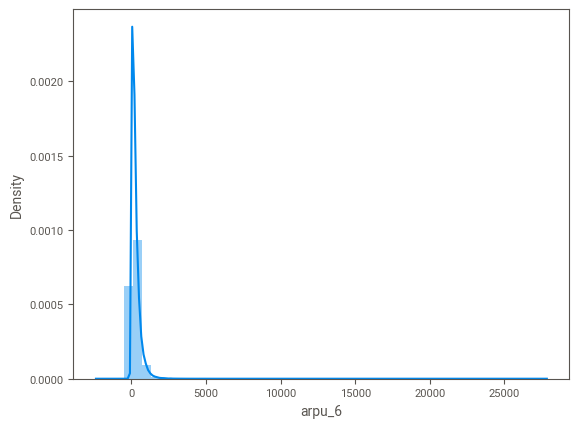

In [114]:
univariate(telecom_churn.arpu_6)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


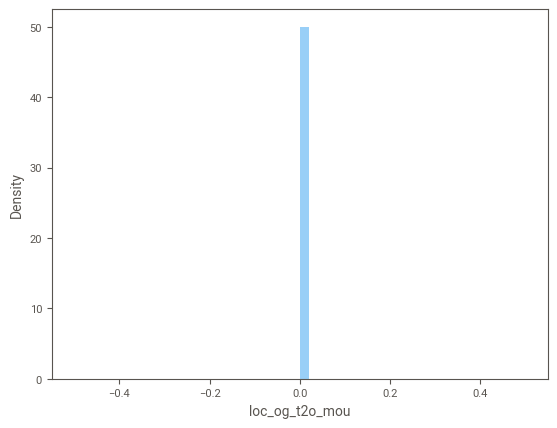

In [115]:
univariate(telecom_churn['loc_og_t2o_mou'])

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


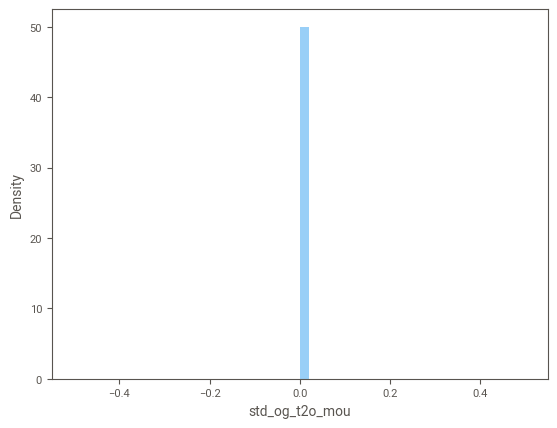

In [116]:
univariate(telecom_churn['std_og_t2o_mou'])

count    69999.000000
mean       133.435303
std        305.709844
min          0.000000
25%          7.260000
50%         35.690000
75%        114.385000
max       8157.780000
Name: onnet_mou_7, dtype: float64


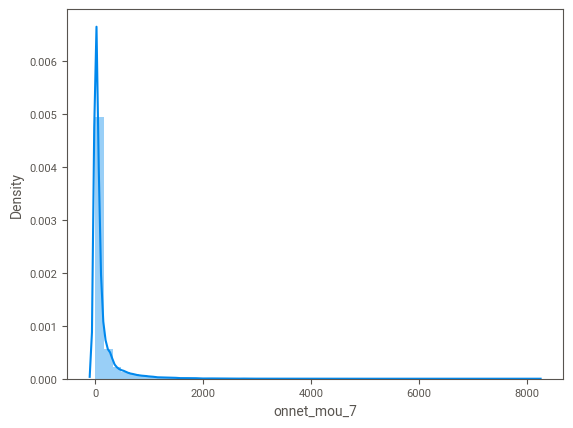

In [117]:
univariate(telecom_churn.onnet_mou_7)

count    69999.000000
mean       167.771851
std        404.668898
min       -695.456423
25%         24.780000
50%         84.680000
75%        221.435000
max      14007.340000
Name: offnet_mou_8, dtype: float64


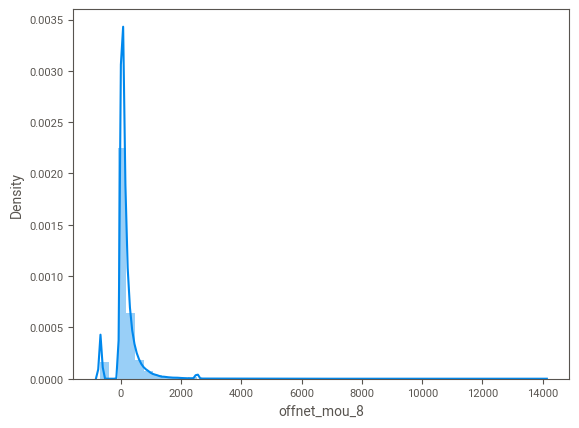

In [118]:
univariate(telecom_churn.offnet_mou_8)

**Variables are skewed towards left**

##### Bivariate EDA

<Axes: xlabel='churn_probability', ylabel='aon'>

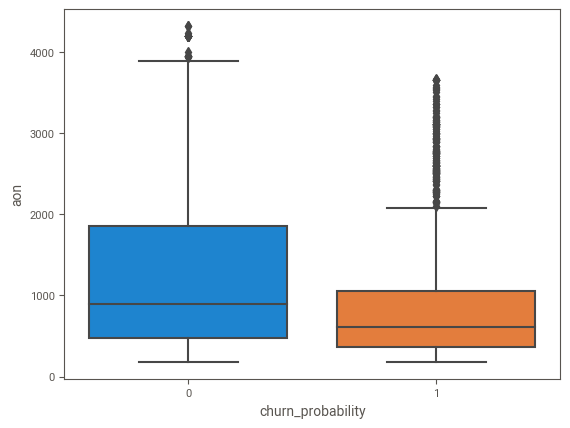

In [119]:
sns.boxplot(x = telecom_churn_filtered.churn_probability,
            y = telecom_churn_filtered.aon)

<Axes: xlabel='churn_probability', ylabel='aug_vbc_3g'>

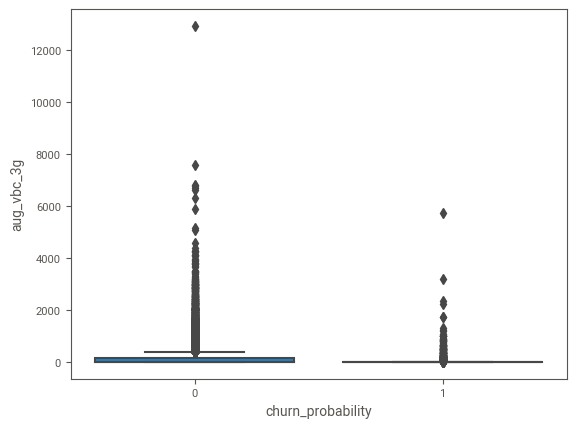

In [120]:
sns.boxplot(y = telecom_churn_filtered['aug_vbc_3g'],
            x = telecom_churn_filtered.churn_probability)

In [121]:
pd.crosstab(telecom_churn_filtered.churn_probability, telecom_churn_filtered.night_pck_user_7,
            normalize='columns')*100

night_pck_user_7,-0.06333293429016233,-0.06235637179016233,-0.06137980929016233,-0.06040324679016233,-0.05942668429016233,-0.05845012179016233,-0.05747355929016233,-0.05649699679016233,-0.05552043429016233,-0.05454387179016233,...,0.03139362821062966,0.03139362821093189,0.03139362821150925,0.03139362821151488,0.0313936282116106,0.03139362821166653,0.03139362821225368,0.031393628212904104,0.03139362821291291,1.0
churn_probability,,,,,,,,,,,,,,,,,,,,,
0,100.0,85.714286,91.891892,85.714286,92.070485,88.314607,89.21875,88.518944,88.428975,86.44222,...,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0,93.726937
1,0.0,14.285714,8.108108,14.285714,7.929515,11.685393,10.78125,11.481056,11.571025,13.55778,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,6.273063


In [122]:
pd.crosstab(telecom_churn_filtered.churn_probability,
            telecom_churn_filtered.sachet_3g_7)

sachet_3g_7,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,31.0,33.0
churn_probability,,,,,,,,,,,,,,,,,,,,,
0,17231,1333,353,144,74,64,46,23,12,9,...,1,1,3,1,3,1,3,1,1,1
1,1508,90,24,10,5,6,3,3,1,2,...,0,1,0,0,0,0,0,1,0,0


##### Cap outliers in all numeric variables with k-sigma technique

In [123]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array < lower_limit] = lower_limit
    array[array > upper_limit] = upper_limit
    return array

In [124]:
# cap outliers in the numeric columns

telecom_churn_filtered[num_cols] = telecom_churn_filtered[num_cols].apply(cap_outliers, axis=0)

## Modelling

### Making predictions

#### Preprocessing data

#### Train test split

In [125]:
# divide data into train and test
telecom_churn_filtered.churn_probability = telecom_churn_filtered.churn_probability.map(
    lambda x: 1 if x > 0 else 0)

X = telecom_churn_filtered.drop("churn_probability", axis=1)
y = telecom_churn_filtered.churn_probability

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X = X, y = y)
X = pd.DataFrame(X).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.25, random_state=4, stratify=y)

In [126]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29019, 133)
(29019,)
(9673, 133)
(9673,)


### PCA

In [127]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [128]:
pca.fit(X=X_train)
churn_pca = pca.fit_transform(X = X_train)

In [129]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       16.39
1       28.16
2       35.71
3       40.76
4       45.24
        ...  
128    100.00
129    100.00
130    100.00
131    100.00
132    100.00
Length: 133, dtype: float64


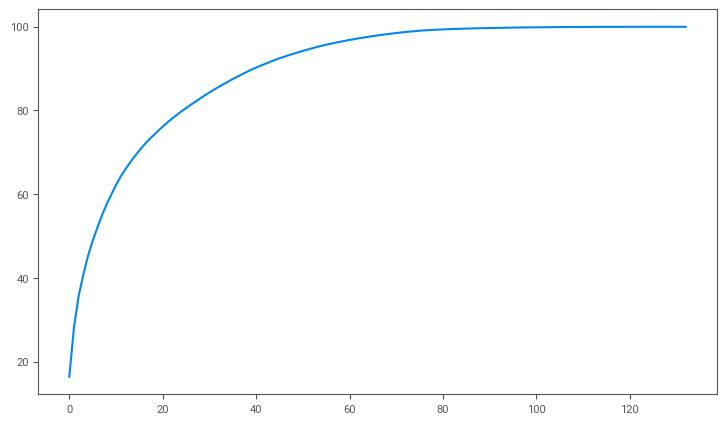

In [130]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(
    np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
# 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.figure(figsize=(175/20, 100/20))
plt.plot(cumulative_variance)

### PCA and Logistic Regression

In [151]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
         ]
pipeline = Pipeline(steps)

In [152]:
# fit model
print(y_train.value_counts())
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

churn_probability
1    14510
0    14509
Name: count, dtype: int64


0.7805920259140563

In [153]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(
    y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n",
      "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("Precision:    \t", round(precision_score(y_test, y_pred), 2))

[[3926  911]
 [1223 3613]]
Sensitivity: 	0.75
Specificity: 	0.81
Precision:    	 0.8


##### Hyperparameter tuning - PCA and Logistic Regression

In [154]:
# class imbalance
y_train.value_counts()/y_train.shape

churn_probability
1    0.500017
0    0.499983
Name: count, dtype: float64

In [157]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0: 0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
         ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [30, 40, 50, 60], 'logistic__C': [
    0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds,
                     param_grid=params, scoring='precision', n_jobs=-1, verbose=1)

In [158]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_logistic__solver,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.312124,0.250198,0.142668,0.014317,0.1,l1,liblinear,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4.837543,1.397359,0.229241,0.081898,0.1,l1,liblinear,40,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,5.377481,0.809905,0.201235,0.016340,0.1,l1,liblinear,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,6.435816,0.786206,0.195484,0.067262,0.1,l1,liblinear,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5.546049,0.376201,0.173752,0.054031,0.1,l2,liblinear,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,4.189120,0.172151,0.124853,0.012443,10,l1,liblinear,60,"{'logistic__C': 10, 'logistic__penalty': 'l1',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
60,3.486585,0.230364,0.087687,0.014125,10,l2,liblinear,30,"{'logistic__C': 10, 'logistic__penalty': 'l2',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
61,4.212726,0.181468,0.132421,0.010942,10,l2,liblinear,40,"{'logistic__C': 10, 'logistic__penalty': 'l2',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,5.616068,0.186211,0.086716,0.029249,10,l2,liblinear,50,"{'logistic__C': 10, 'logistic__penalty': 'l2',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  nan
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear', 'pca__n_components': 30}


In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(
    y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n",
      "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("Precision:    \t", round(precision_score(y_test, y_pred), 2))

[[ 445 4392]
 [  30 4806]]
Sensitivity: 	0.99
Specificity: 	0.09
Precision:    	 0.52


### Random Forest

In [ ]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, n_jobs=-1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds,
                     param_grid=params, scoring='precision', n_jobs=-1, verbose=1)

In [ ]:
#Fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
# print best hyperparameters
print("Best Precision: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9828814430374052
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(
    y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n",
      "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("Precision:    \t", round(precision_score(y_test, y_pred), 2))

[[4756   81]
 [ 356 4480]]
Sensitivity: 	0.93
Specificity: 	0.98
AUC:    	 0.98


##### ii) Choosing best features

In [ ]:
# run a random forest model on train data
# number of variables to consider to split each node
max_features = int(round(np.sqrt(X_train.shape[1])))
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0: 0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [ ]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   39.9s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [ ]:
# OOB score
rf_model.oob_score_

0.9500327371721975

In [ ]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(
    y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n",
      "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("Precision:    \t", round(precision_score(y_test, y_pred_prob), 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[4762   75]
 [ 377 4459]]
Sensitivity: 	0.92
Specificity: 	0.98
Precision:  0.9834583149536833
ROC:    	 0.99


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Feature Importance

In [ ]:
# predictors
features = telecom_churn_filtered.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame(
    {'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values(
    'importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000003


,variables,importance_percentage
0,night_pck_user_7,4.757367
1,night_pck_user_6,2.912608
2,fb_user_6,2.571675
3,fb_user_7,2.478876
4,monthly_2g_6,2.252515
...,...,...
128,std_og_t2c_mou_6,0.000000
129,std_ic_t2o_mou_7,0.000000
130,loc_ic_t2o_mou,0.000000
131,std_og_t2o_mou,0.000000


In [ ]:
#### Extracting top 30 features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<Axes: >

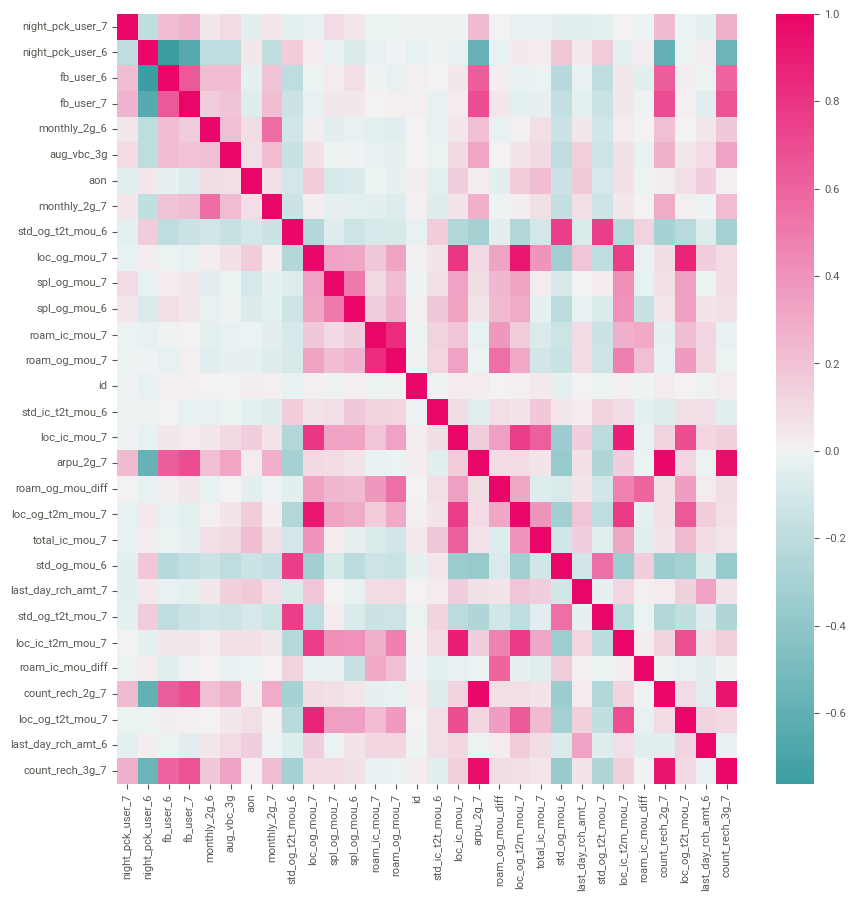

In [ ]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [ ]:
top_features = ['night_pck_user_7', 'night_pck_user_6', 'fb_user_6', 'fb_user_7', 'monthly_2g_6', 'aug_vbc_3g',
                'aon', 'monthly_2g_7', 'std_og_t2t_mou_6']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [ ]:
# logistic regression
steps = [('scaler', StandardScaler()),
         ("logistic", LogisticRegression(class_weight={0: 0.1, 1: 0.9}))
         ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4,
                          5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds,
                     param_grid=params, scoring='precision_score', n_jobs=-1, verbose=1)

In [ ]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [ ]:
# print best hyperparameters
print("Best Precision: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7463856904990345
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [ ]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(
    y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n",
      "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("Precision:    \t", round(precision_score(y_test, y_pred_prob), 2))

[[ 449 4388]
 [  28 4808]]
Sensitivity: 	0.99
Specificity: 	0.09
Precision:  0.5228360156589822
ROC:    	 0.75
